# Coin flip example

Work through of an approach to updating the precieved probablity of a binary event as new information becomes available.

## Set up

In [1]:
#--- Libraries
import pandas  as pd                # stats packages
import numpy   as np                # linear algebra packages

import matplotlib.pyplot as plt     # ploting packages
import seaborn as sns               # more plotting routines

from scipy.stats import beta        # funtion defining beta distribution
from scipy.stats import binom       # funtion defining binomial distribution

#--- Configure plotting environments/defaults
# use 'cartoon-style'
plt.xkcd()
# use white background 
sns.set_style('white')
# set color choices
c = sns.color_palette('deep')

# show plots in notebook 
% matplotlib inline


## Example

For this example will consider tossing a weighted coin. How do we we modify our precieved probability of the coin landing heads as we observe more and more coin tosses? Here we describe the probability that a certain percentage equals the number of heads we will observe after a 'large number' of coin tosses with a $\mathrm{Beta}$ distribution. 

To describe our initial take on the situation will use a Jeffreys prior for the [Prior distribution](https://en.wikipedia.org/wiki/Beta_distribution#Jeffreys.27_prior_probability_.28Beta.281.2F2.2C1.2F2.29_for_a_Bernoulli_or_for_a_binomial_distribution.29), which is .

$\mathrm{P}(\mathrm{heads}) \overset{\Delta}{=} \mathrm{Beta}\left(\alpha=\frac{1}{2},\beta=\frac{1}{2}\right)$

Essentially this implies that we consdier any possible "probability of heads" to be equally likely, except for $0\%$ or $100\%$, which are undefined. 

We will update this distribution to a [Posterior distribution](https://en.wikipedia.org/wiki/Beta_distribution#Effect_of_different_prior_probability_choices_on_the_posterior_beta_distribution) as we observe more and more coin tosses as:

For $n$ samples, containing $h$ 'heads', the posterior distribution is:

$\mathrm{P}(\mathrm{heads}) \overset{\Delta}{=} \mathrm{Beta}\left(\alpha=h+\alpha^{*},\beta=n-h+\beta^{*}\right)$ 

where $\alpha^{*}$, $\beta^{*}$ are the previous estimates for $\alpha$ and $\beta$

### Initial samples

/home/tristan/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


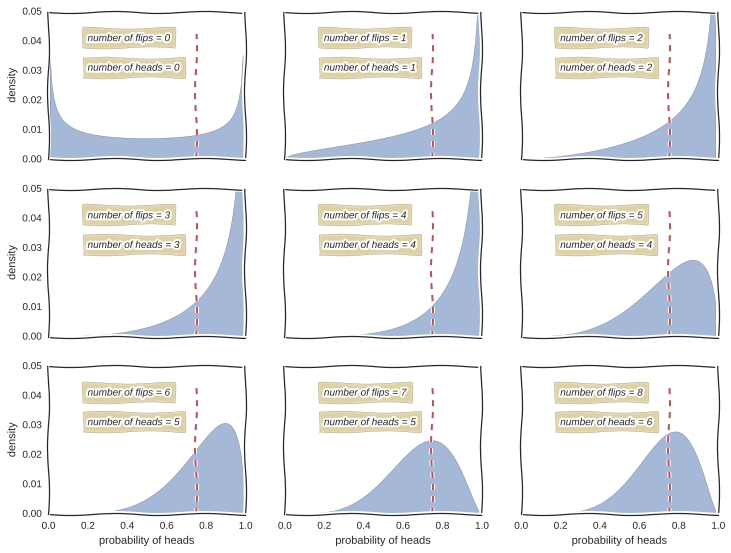

In [2]:
#--- Set up example
# create a figure
fig, chart = plt.subplots(3,3,figsize=(12,9),sharex=True,sharey=True)
# set number of examples to show
n_trials = 8
# possible 'probabilities of heads' to evaluate
p = np.arange(0.01,1.0,0.01)
# set bias of weighted coin
w = 0.75
# set initial parameter values
a = 0.5 ; b = 0.5
# set initial number of counts
N = 0
# set initial number of hits
H = 0

#--- Show initial (prior) distribution
# calculate the prob. density for the test points
dens = beta.pdf(p,a,b) / beta.pdf(p,a,b).sum()
# show density
chart[int(N/3),N%3].fill_between(p,dens,0,alpha=0.5)
# write out how many times coin has been flipped
chart[int(N/3),N%3].text(0.2,0.04,'number of flips = '+str(N), style='italic',
                         bbox={'facecolor':c[4], 'alpha':0.4, 'pad':10})
# write out how many times coin has come up heads
chart[int(N/3),N%3].text(0.2,0.03,'number of heads = '+str(H), style='italic',
                         bbox={'facecolor':c[4], 'alpha':0.4, 'pad':10})
# set y-axis limit
chart[int(N/3),N%3].set_ylim(0,0.05)
# draw line showing 'true' probability of heads
chart[int(N/3),N%3].axvline(x=0.75,ymin=0,ymax=0.85,color=c[2],linestyle='--')
# label axis
chart[int(N/3),N%3].set_ylabel('density')

#--- Run simulation
# perform individual coin flips and update stats each time
for i in range(n_trials) : 
    # flip coin (coin is flipped once per sample)
    n = 1       
    h = binom.rvs(n,w,random_state=N)
    # update parameters
    a = h + a
    b = n - h + b
    N = N + n
    H = H + h
    # calculate the prob. density for the test points
    dens = beta.pdf(p,a,b) / beta.pdf(p,a,b).sum()
    # show density
    chart[int(N/3),N%3].fill_between(p,dens,0,alpha=0.5)
    # write out how many times coin has been flipped
    chart[int(N/3),N%3].text(0.2,0.04,'number of flips = '+str(N), style='italic',
                             bbox={'facecolor':c[4], 'alpha':0.4, 'pad':10})
    # write out how many times coin has come up heads
    chart[int(N/3),N%3].text(0.2,0.03,'number of heads = '+str(H), style='italic',
                             bbox={'facecolor':c[4], 'alpha':0.4, 'pad':10})
    # set y-axis limit
    chart[int(N/3),N%3].set_ylim(0,0.05)
    # draw line showing 'true' probability of heads
    chart[int(N/3),N%3].axvline(x=0.75,ymin=0,ymax=0.85,color=c[2],linestyle='--')
    # label axis
    if N>5 :
        chart[int(N/3),N%3].set_xlabel('probability of heads')
    if N%3 == 0 :
        chart[int(N/3),N%3].set_ylabel('density')

# save figure
plt.savefig('../figures/initial_coin_flips.png')

### Extended sampling

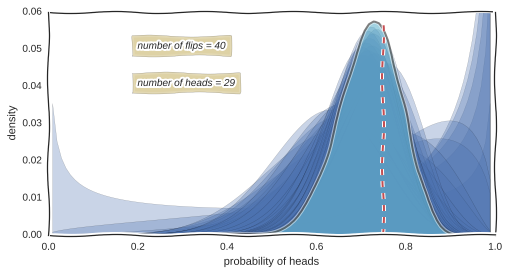

In [3]:
#--- Set up example
# create a figure
fig, chart = plt.subplots(1,figsize=(8,4))
# set number of examples to show
n_trials = 40
# possible 'probabilities of heads' to evaluate
p = np.arange(0.01,1.0,0.01)
# set bias of weighted coin
w = 0.75
# set initial parameter values
a = 0.5 ; b = 0.5
# set initial number of counts
N = 0
# set initial number of hits
H = 0

#--- Show initial (prior) distribution
# calculate the prob. density for the test points
dens = beta.pdf(p,a,b) / beta.pdf(p,a,b).sum()
# show density
chart.fill_between(p,dens,0,alpha=0.3)
# set y-axis limit
chart.set_ylim(0,0.06)
# label axis
chart.set_ylabel('density')
chart.set_xlabel('probability of heads')
#--- Simulation
for i in range(n_trials) : 
    # flip coin (coin is flipped once per sample)
    n = 1       
    h = binom.rvs(n,w,random_state=N)
    # update parameters
    a = h + a
    b = n - h + b
    N = N + n
    H = H + h
    # calculate the prob. density for the test points
    dens = beta.pdf(p,a,b) / beta.pdf(p,a,b).sum()
    # show evolving densities, with emphisis on final estimate
    if N < n_trials :
        chart.fill_between(p,dens,0,alpha=0.3)
    else :
        chart.fill_between(p,dens,0,alpha=0.6,color=c[5])
        chart.plot(p,dens,alpha=0.5,color='black')
        chart.axvline(x=0.75,ymin=0,ymax=0.95,color=c[2],linestyle='--')
        chart.text(0.2,0.05,'number of flips = '+str(N), style='italic',
                   bbox={'facecolor':c[4], 'alpha':0.4, 'pad':10})
        chart.text(0.2,0.04,'number of heads = '+str(H), style='italic',
                   bbox={'facecolor':c[4], 'alpha':0.4, 'pad':10})

plt.savefig('../figures/extended_coin_flips.png')